# SPAM SMS DETECTION

## Important The Important Libraries

In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

## Reading The Dataset

In [3]:
dataset = pd.read_csv('spam.csv',encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Checking The Dataset For Preprocessing

In [5]:
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4433,ham,Sounds great! Im going to sleep now. Have a go...,NaN,NaN,NaN
4399,ham,Juz go google n search 4 qet...,NaN,NaN,NaN
1954,ham,Good night. Am going to sleep.,NaN,NaN,NaN
3503,ham,Will you be here for food,NaN,NaN,NaN
1456,ham,U sleeping now.. Or you going to take? Haha.. ...,NaN,NaN,NaN


In [9]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
dataset.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
dataset.duplicated().sum()

403

In [15]:
dataset.drop_duplicates(inplace=True)

In [17]:
dataset.duplicated().sum()

0

In [19]:
dataset.shape

(5169, 5)

In [21]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3996,spam,Bored housewives! Chat n date now! 0871750.77....,NaN,NaN,NaN
2993,ham,"No idea, I guess we'll work that out an hour a...",NaN,NaN,NaN
289,ham,"Dear,shall mail tonite.busy in the street,shal...",NaN,NaN,NaN
5430,ham,If you can make it any time tonight or wheneve...,NaN,NaN,NaN
5078,ham,Mark works tomorrow. He gets out at 5. His wor...,NaN,NaN,NaN


In [23]:
dataset.fillna('',inplace=True)

In [25]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [27]:
dataset.shape

(5169, 5)

## Renaming Columns Of The Dataset For Better Readability

In [29]:
dataset.rename(columns={'v1':'Category','v2':'Message'},inplace=True)
dataset=dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [31]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
dataset['Category'].unique()

array(['ham', 'spam'], dtype=object)

## Reordering The Columns To Match The Right Encoding

In [35]:
new_order = ['Message','Category']

In [37]:
dataset=dataset[new_order]

In [39]:
dataset.head()

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


## Encoding The Categorical Data

In [41]:
encoder = LabelEncoder()
dataset['Category'] = encoder.fit_transform(dataset['Category'])

In [43]:
dataset['Category'].unique()

array([0, 1])

In [45]:
dataset.head()

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## Defining A Function That Preprocesses The Text For Better Model Performance

In [47]:
def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in words if word not in stop_words and len(word) > 2)
    return text

dataset['clean_Message'] = dataset['Message'].apply(preprocess_text)

In [48]:
dataset.head()

,Message,Category,clean_Message
0,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis great world...
1,Ok lar... Joking wif u oni...,0,lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win cup final tkts may te...
3,U dun say so early hor... U c already then say...,0,dun say early hor already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


In [51]:
dataset=dataset.drop(['Message'],axis=1)

In [53]:
dataset.head()

,Category,clean_Message
0,0,jurong point crazy available bugis great world...
1,0,lar joking wif oni
2,1,free entry wkly comp win cup final tkts may te...
3,0,dun say early hor already say
4,0,nah think goes usf lives around though


In [55]:
new_order = ['clean_Message','Category']

In [57]:
dataset=dataset[new_order]

In [59]:
dataset.head()

,clean_Message,Category
0,jurong point crazy available bugis great world...,0
1,lar joking wif oni,0
2,free entry wkly comp win cup final tkts may te...,1
3,dun say early hor already say,0
4,nah think goes usf lives around though,0


## Splitting The Datasets To Matrix of Features (X) & Independent Vector (y)

In [61]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [63]:
print(X)

[['jurong point crazy available bugis great world buffet cine got amore wat']
 ['lar joking wif oni']
 ['free entry wkly comp win cup final tkts may text receive entry question std txt rate apply']
 ...
 ['pity mood suggestions']
 ['guy bitching acted like interested buying something else next week gave free']
 ['rofl true name']]


In [65]:
print(y)

[0 0 1 ... 0 0 0]


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, stratify=y ,random_state=0)

In [69]:
# Convert NumPy arrays to lists of strings
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]

In [71]:
print(type(X_train))

<class 'list'>


In [73]:
# Transform the text data to feature vectors that can be used as input to Logistic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert y_train and y_test to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Trying Models And Evaluating Thier Scores

In [77]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_features,y_train)

LogisticRegression()

In [83]:
y_predLR = LR_classifier.predict(X_train_features)

In [87]:
accuracy = accuracy_score(y_train, y_predLR)
print(accuracy)

0.9620314389359129


In [89]:
y_predLR1= LR_classifier.predict(X_test_features)

In [95]:
# prediction on test data
accuracy1 = accuracy_score(y_test, y_predLR1)
print(accuracy1)

0.9535783365570599


In [97]:
cm = confusion_matrix(y_test, y_predLR1)

print(cm)

[[901   2]
 [ 46  85]]


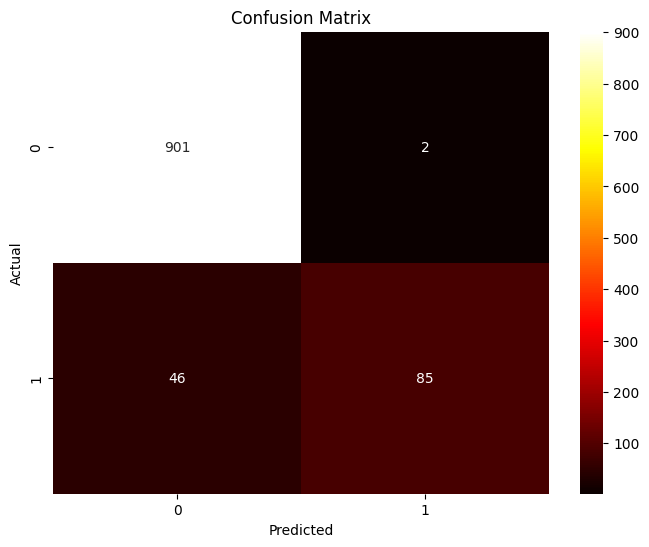

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='hot', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()